# 1. Scraping all the link of the card.
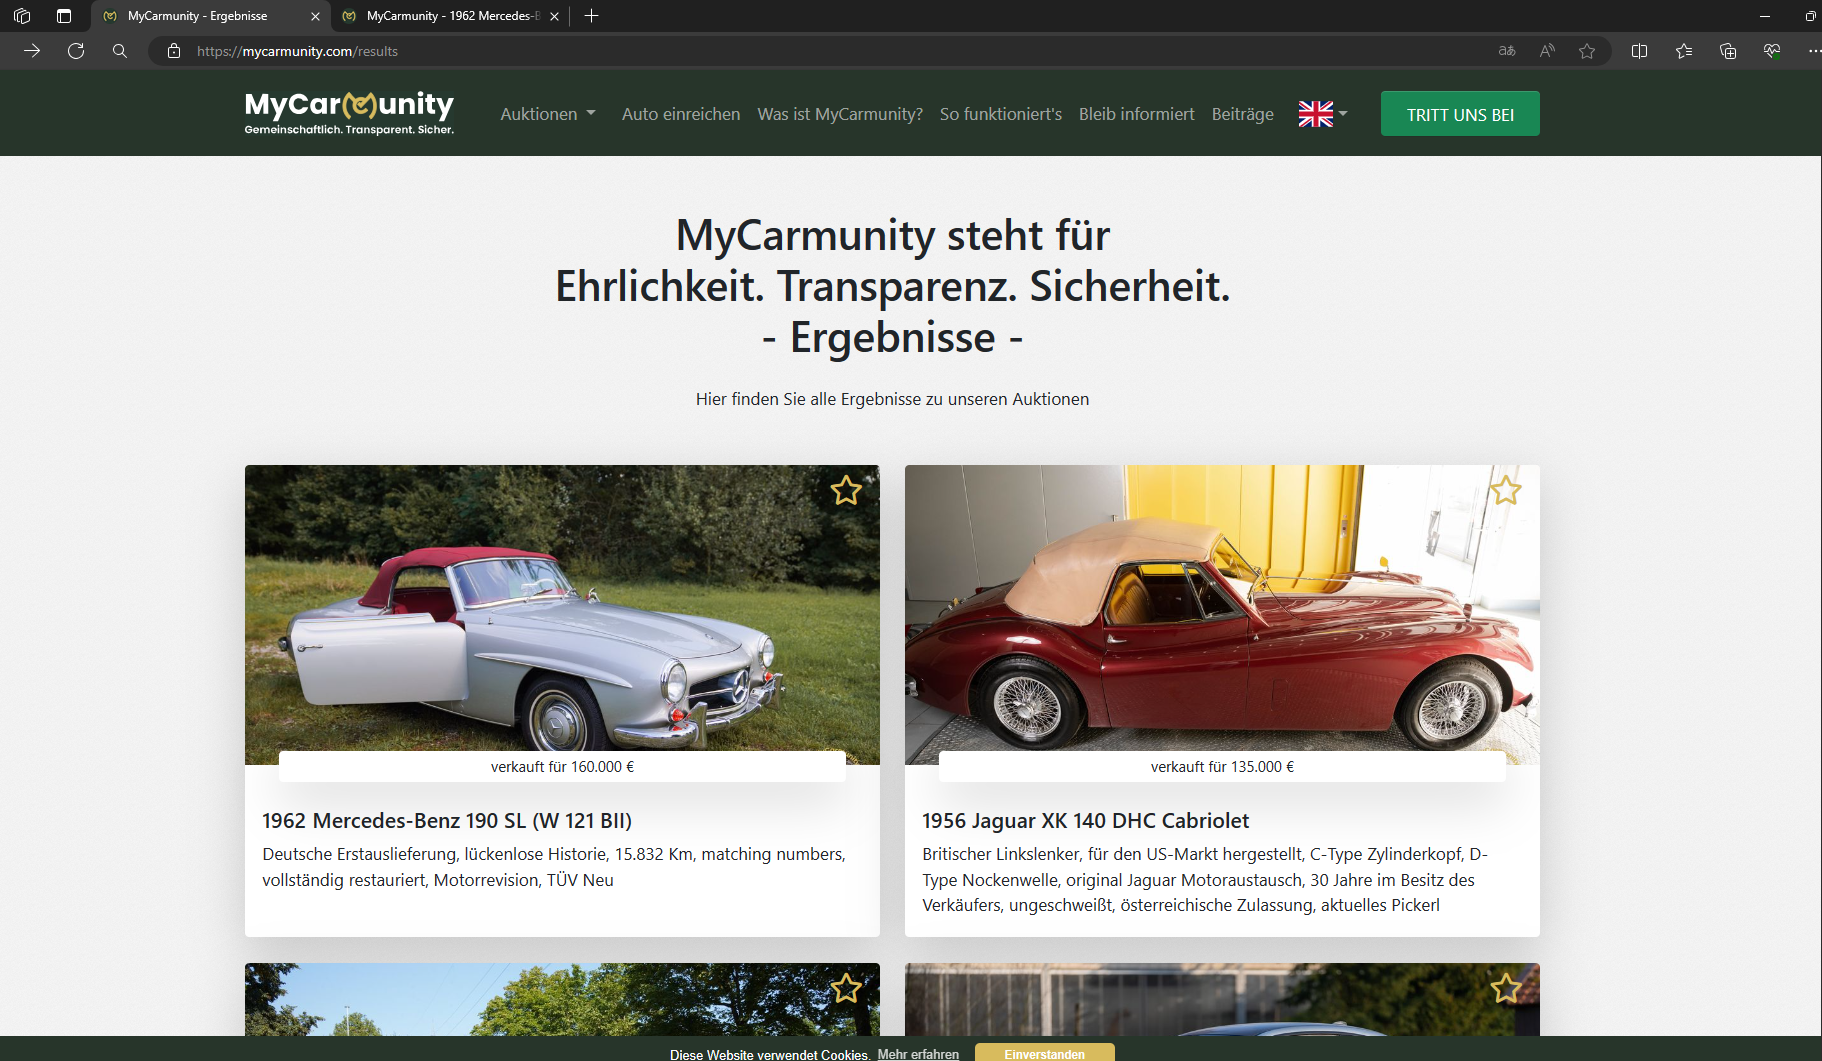
- Firstly, i want to scraping all the link of all the card in this page so that when i scrapping data, this just go from link to link to extract data.
- I will save all the link in links.txt

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import time

# Khởi tạo webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Truy cập trang web
driver.get('https://mycarmunity.com/results')

# Chờ 10 giây để trang web tải xong
time.sleep(10)

# Tìm tất cả các thẻ a trong thẻ app-result-auction-card và lấy thuộc tính href
links = driver.find_elements(By.CSS_SELECTOR, "app-result-auction-card a.stretched-link")

# Lấy tất cả các liên kết
urls = [link.get_attribute('href') for link in links]

# Mở file để ghi
with open('links.txt', 'w') as f:
    for url in urls:
        if url is not None:
            f.write(url + '\n')
        else:
            f.write('No link not found\n')

# Đóng trình duyệt
driver.quit()

TypeError: WebDriver.__init__() got an unexpected keyword argument 'timeout'

In [3]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv

# Read links from the 'links.txt' file
with open('links.txt', 'r') as file:
    urls = file.read().splitlines()

# Khởi tạo trình duyệt
s = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s)

# Tạo DataFrame rỗng để lưu trữ dữ liệu
car_auction_data = pd.DataFrame(columns=['Car Name', 'Special Hook', 'Description', 'Sold For', 'Bid Count', 'Comment Count', 'Price Category', 'Auto Biography'])

# Duyệt qua từng link và thu thập dữ liệu
for url in urls:
    try:
        # Mở trang web
        driver.get(url)
        time.sleep(5)  # Đợi cho trang web load hoàn chỉnh
        
        # Trích xuất thông tin chi tiết
        cars_name = driver.find_element(By.CSS_SELECTOR, 'body > app-root > app-result-auction > div > div > app-hero > div.d-none.d-md-flex.hero.align-items-end.p-0 > div > div > h1').text
        special_hook = driver.find_element(By.CSS_SELECTOR, 'body > app-root > app-result-auction > div > div > app-hero > div.d-none.d-md-flex.hero.align-items-end.p-0 > div > div > h4').text
        description = driver.find_element(By.CSS_SELECTOR, '#teaser > app-teaser > section > div > div.col-md-10').text
        sold_for = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.row.m-0 > div:nth-child(1) > div > p').text
        bid_count = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.row.m-0 > div:nth-child(2) > div > p').text
        comt_count = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.row.m-0 > div.col-12.col-md-3.mt-2.pl-1.pr-0.text-break > div > p').text
        price_cat = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.p-2.w-100 > div > a').text
        auto_bio = driver.find_element(By.CSS_SELECTOR, '#timeline > app-timeline > div > p').text
        
        # Thêm thông tin vào DataFrame
        new_row = {'Car Name': cars_name,
           'Special Hook': special_hook,
           'Description': description,
           'Sold For': sold_for,
           'Bid Count': bid_count,
           'Comment Count': comt_count,
           'Price Category': price_cat,
           'Auto Biography': auto_bio}

        # Tạo một DataFrame từ new_row và nối nó với car_auction_data
        car_auction_data = pd.concat([car_auction_data, pd.DataFrame([new_row])], ignore_index=True)
    except Exception as e:
        print(f"Error retrieving data from URL {url}: {str(e)}")

# Lưu DataFrame vào tệp CSV
car_auction_data.to_csv('car_auction_data.csv', index=False)

# Đóng trình duyệt khi hoàn tất
driver.quit()

# In DataFrame ra console để kiểm tra
print(car_auction_data)


TypeError: WebDriver.__init__() got an unexpected keyword argument 'service'

In [71]:
import googletrans

import pandas as pd
from googletrans import Translator

# Assuming car_auction_data is your DataFrame containing the data
df = pd.DataFrame(car_auction_data)
df['Bid Count'] = df['Bid Count'].astype(str)  # Chuyển đổi thành chuỗi nếu nó là số

# Create a translator object
translator = Translator()

def translate_column(data, lang_src, lang_dest):
    translated_data = []
    for text in data:
        try:
            translated = translator.translate(text, src=lang_src, dest=lang_dest).text
            translated_data.append(translated)
        except Exception as e:
            print(f"Translation error: {e}")
            translated_data.append(text)  # Keep original text if translation fails
    return translated_data

# Apply translation
df['Car Name'] = translate_column(df['Car Name'], 'de', 'en')
df['Special Hook'] = translate_column(df['Special Hook'], 'de', 'en')
df['Description'] = translate_column(df['Description'], 'de', 'en')
df['Sold For'] = translate_column(df['Sold For'], 'de', 'en')
df['Bid Count'] = translate_column(df['Bid Count'], 'de', 'en')
df['Comment Count'] = translate_column(df['Comment Count'], 'de', 'en')
df['Price Category'] = translate_column(df['Price Category'], 'de', 'en')
df['Auto Biography'] = translate_column(df['Auto Biography'], 'de', 'en')


Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object has no attribute 'raise_Exception'
Translation error: 'Translator' object

In [72]:
df

,Car Name,Special Hook,Description,Sold For,Bid Count,Comment Count,Price Category,Auto Biography
0,1962 Mercedes-Benz 190 SL (W 121 BII),"German initial delivery, complete history, 15,...","In this “Sport light” (SL), the presentation o...","Sold for € 160,000",25 commandments,14 comments,Restaurierter Neuwagenzustand,The 190 SL was first admitted to a master pain...
1,1956 Jaguar XK 140 DHC Cabriolet,"British left handlebars, made for the US marke...",This XK 140 DHC was produced in 1956 by Jaguar...,"Sold for € 135,000",0 commandments,0 comments,Luxury vehicle,The XK 140 DHC was built in England in 1956 an...
2,2013 Lamborghini Gallardo LP 560-4 “50th Anniv...,"Original condition, limited special model, com...",This Lamborghini Gallardo LP 560-4 in the limi...,"Sold for € 90,000",4 bids,3 comments,Luxury vehicle,"This Gallardo LP 560-4 was first ""Blu Caelum"" ..."
3,2012 BMW M3 Coupé (E92),"German initial delivery, new factory car with ...",This BMW M3 produced in 2012 is something very...,"Sold for € 85,000",23 Gebote,7 comments,Luxury vehicle,The coupé was delivered to the Bavarian Motors...
4,No minimum price: 1995 Hotzenblitz Buggy,"First German electric vehicle, advertising veh...",The Hotzenblitz was the first to produce and s...,"Sold for € 6,700",19 commandments,29 comments,Entry -level,Der Hotzenblitz wurde 1995 erstmals für den St...
...,...,...,...,...,...,...,...,...
86,1954 mg TF 1250,"Rarely left handlebars, matching Numbers, elab...","From October 1953, the TF entered the footstep...",minimum price not reached,1 Gebote,1 comments,Classic everyday,Der TF 1250 wurde für den US-Amerikanischen Ma...
87,Benefit auction: 1927 Mercedes-Benz 12/55 PS T...,Probably the last “Mannheim” in unrestored ori...,"According to the expert assessment, this almos...",Mindestpreis nicht erreicht,34 commandments,6 comments,Restaurationsprojekt für Experten,"Due to the Second World War, all documents wer..."
88,1975 Ferrari Dino 208 GT4,"One of only 840 copies, extensively restored, ...","Melandful name, chic but factual design by Ber...",Mindestpreis nicht erreicht,6 commandments,8 comments,Restored new car condition,The 1975 Ferrari Dino 208 GT4 was acquired by ...
89,1988 VW Golf 19e 1.3i,"2. Hand, complete 40,105 kilometers, original ...",This VW Golf 19e 1.3i or Golf 2 from 1988 in T...,Mindestpreis nicht erreicht,17 commandments,15 comments,Entry -level,The 1988 Golf 2 was acquired by a Volkswagen b...


In [23]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv

# Read links from the 'links.txt' file
with open('links copy.txt', 'r') as file:
    urls = file.read().splitlines()

# Khởi tạo trình duyệt
s = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=s)


# Tạo DataFrame rỗng để lưu trữ dữ liệu
car_auction_data = pd.DataFrame(columns=['Car Name', 'Special Hook', 'Description', 'Sold For', 'Bid Count', 'Comment Count', 'Price Category', 'Auto Biography'])

# Duyệt qua từng link và thu thập dữ liệu
for url in urls:
    try:
        # Mở trang web
        driver.get(url)
        time.sleep(5)  # Đợi cho trang web load hoàn chỉnh

        # Mô phỏng hành động click chuột phải để dịch trang web
        # Bạn cần tìm một phần tử thích hợp để click chuột phải và dịch
        actions = ActionChains(driver)
        actions.context_click().perform()
        time.sleep(1)
        # Bạn cần tinh chỉnh số lần nhấn mũi tên xuống để đến đúng vị trí 'Translate to English' trong menu
        actions.send_keys(Keys.ARROW_DOWN * 9).send_keys(Keys.ENTER).perform()
        # Đợi một khoảng thời gian cho trang web được dịch
        time.sleep(5)

        # Trích xuất thông tin chi tiết
        cars_name = driver.find_element(By.CSS_SELECTOR, 'body > app-root > app-result-auction > div > div > app-hero > div.d-none.d-md-flex.hero.align-items-end.p-0 > div > div > h1').text
        special_hook = driver.find_element(By.CSS_SELECTOR, 'body > app-root > app-result-auction > div > div > app-hero > div.d-none.d-md-flex.hero.align-items-end.p-0 > div > div > h4').text
        description = driver.find_element(By.CSS_SELECTOR, '#teaser > app-teaser > section > div > div.col-md-10').text
        sold_for = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.row.m-0 > div:nth-child(1) > div > p').text
        bid_count = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.row.m-0 > div:nth-child(2) > div > p > i').text
        comt_count = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.row.m-0 > div.col-12.col-md-3.mt-2.pl-1.pr-0.text-break > div > p > i').text
        price_cat = driver.find_element(By.CSS_SELECTOR, '#resultBidding > app-result-bidding > div > div > div > div.p-2.w-100 > div > a').text
        auto_bio = driver.find_element(By.CSS_SELECTOR, '#timeline > app-timeline > div > p').text
        
        # Thêm thông tin vào DataFrame
        new_row = {'Car Name': cars_name,
           'Special Hook': special_hook,
           'Description': description,
           'Sold For': sold_for,
           'Bid Count': bid_count,
           'Comment Count': comt_count,
           'Price Category': price_cat,
           'Auto Biography': auto_bio}

        # Tạo một DataFrame từ new_row và nối nó với car_auction_data
        car_auction_data1 = pd.concat([car_auction_data, pd.DataFrame([new_row])], ignore_index=True)
    except Exception as e:
        print(f"Error retrieving data from URL {url}: {str(e)}")

# Lưu DataFrame vào tệp CSV
car_auction_data1.to_csv('car_auction_data1.csv', index=False)

# Đóng trình duyệt khi hoàn tất
driver.quit()

# In DataFrame ra console để kiểm tra
car_auction_data1


,Car Name,Special Hook,Description,Sold For,Bid Count,Comment Count,Price Category,Auto Biography
0,2013 Lamborghini Gallardo LP 560-4 “50th anniv...,"Original condition, limited special model, com...",This Lamborghini Gallardo LP 560-4 in the limi...,"sold for €90,000",,,luxury vehicle,Dieser Gallardo LP 560-4 wurde als Sondermodel...
